In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
pt = 4/3
halfsize = (3, 3/1.618)
fullsize = (5, 5/1.618)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [40]:
def potf(x):
    return 0*x

def potpot_indiv(x):
    if x <= 0 or x >= 1:
        return np.inf
    else:
        return 0.
    
def potpot(x):
    return np.vectorize(potpot_indiv)(x)

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [6]:
def do_sim(num_steps,num_traj,pot,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    fig,ax = plt.subplots(2,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    return plt.gcf()

# Consistent start

In [257]:
%%time
x = do_sim(5000,1000,potpot, xinit=0.5)
# plot_sim(x).show()

CPU times: user 1.39 s, sys: 3 µs, total: 1.39 s
Wall time: 1.39 s


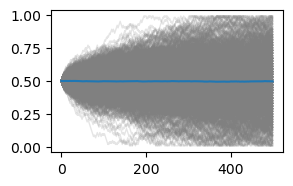

In [267]:
plt.figure(figsize=halfsize)
end = 500
for t in x.T:
	plt.plot(t[0:end], color="gray", lw=1, alpha=0.2)
plt.plot(np.average(x[0:end], axis=1))
plt.savefig("../figures/02 time evolution.pdf")
plt.show()

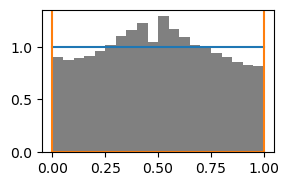

In [263]:
plt.figure(figsize=halfsize)
hist, bins = np.histogram(x.ravel(), bins=np.arange(0, 1+0.05, 0.05), density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist), color="gray")
plt.plot([0,1], [1,1], color=colors[0])
plt.plot([0, 1], [0, 0], color=colors[1])
plt.axvline(0, color=colors[1])
plt.axvline(1, color=colors[1])
plt.savefig("../figures/02 histogram.pdf")
plt.show()

# Random Start

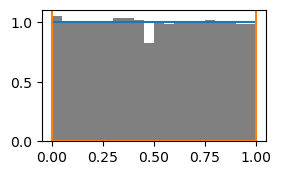

In [264]:
plt.figure(figsize=halfsize)
hist, bins = np.histogram(x[2000:].ravel(), bins=np.arange(0, 1+0.05, 0.05), density=True)
plt.bar(bins[:-1], hist, align="edge", width=1/len(hist), color="gray")
plt.plot([0,1], [1,1], color=colors[0])
plt.plot([0, 1], [0, 0], color=colors[1])
plt.axvline(0, color=colors[1])
plt.axvline(1, color=colors[1])
plt.tight_layout()
plt.savefig("../figures/02 histogram random start.pdf")
plt.show()

# 2D hist

In [252]:
import numpy as np

def reduce_dimension_by_sum(arr, n, axis=0):
    """
    Reduces the length of one dimension of a 2D numpy array by summing every `n` neighboring elements.
    
    Parameters:
        arr (np.ndarray): Input 2D array.
        n (int): Number of neighboring elements to sum.
        axis (int): The axis to reduce (0 for rows, 1 for columns).
    
    Returns:
        np.ndarray: Reduced 2D array.
    """
    if axis == 0:
        new_shape = (arr.shape[0] // n, n, arr.shape[1])
    elif axis == 1:
        new_shape = (arr.shape[0], arr.shape[1] // n, n)
    else:
        raise ValueError("Axis must be 0 (rows) or 1 (columns)")

    trimmed_size = (arr.shape[axis] // n) * n  # Ensure divisibility
    if axis == 0:
        arr = arr[:trimmed_size, :]
    else:
        arr = arr[:, :trimmed_size]

    reshaped = arr.reshape(new_shape)
    return reshaped.sum(axis=1 if axis == 0 else 2)

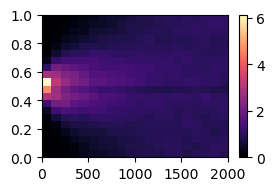

CPU times: user 1.31 s, sys: 5.96 ms, total: 1.32 s
Wall time: 1.32 s


In [254]:
%%time
x = do_sim(2000,2000,potpot, xinit=0.5)

bins = np.arange(0, 1+0.05, 0.05)
times = range(x.shape[1])
hist = np.array([np.histogram(i, bins, density=True)[0] for i in x])
hist = reduce_dimension_by_sum(hist, 100)/100

plt.figure(figsize=halfsize)
plt.imshow(
	hist.T,
	aspect="auto",
	origin="lower",
	extent=[
		0, x.shape[1], 
		0, 1
	],
	cmap="magma",
	vmin=0,
)
plt.colorbar(label="")

plt.savefig("../figures/02 histogram evolution.pdf")
plt.show()